In [1]:
%store -r __impR

In [2]:
__impR

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [4]:
def concat_df(x,y):
    return pd.concat([x,y]).reset_index(drop=True)

def split_df(x):
    return x[0:1460],x[1461:2920].drop('SalePrice',axis=1)

In [5]:
df_train = train.copy()
df_test = test.copy()
df_all = concat_df(df_train,df_test)

df_train.name = 'TRAIN DATA'
df_test.name = 'TEST DATA'
df_all.name = 'ALL DATA'

dfs = [df_train,df_test]

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

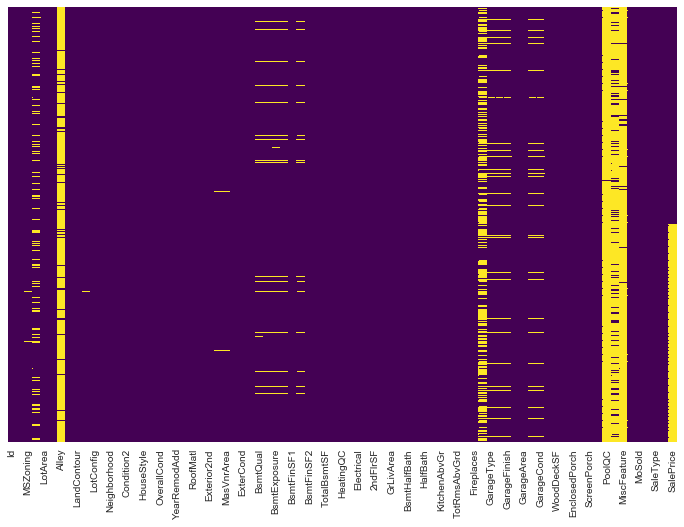

In [7]:
sns.heatmap(df_all.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [8]:
df_all.loc[7]

Id                    8
MSSubClass           60
MSZoning             RL
LotFrontage         NaN
LotArea           10382
                  ...  
MoSold               11
YrSold             2009
SaleType             WD
SaleCondition    Normal
SalePrice        200000
Name: 7, Length: 81, dtype: object

In [9]:
df_all.groupby(['MSSubClass']).mean()['LotFrontage']

MSSubClass
20     77.667785
30     60.952381
40     53.400000
45     55.555556
50     63.156489
60     79.042986
70     64.213675
75     74.523810
80     78.635294
85     73.437500
90     70.836957
120    44.653333
150          NaN
160    26.887931
180    26.250000
190    68.228070
Name: LotFrontage, dtype: float64

In [12]:
def fill_LotFrontage(c):
    MS = c[0]
    LF = c[1]
    x = df_all.groupby(['MSSubClass']).mean()['LotFrontage']
    x[150] = np.mean(x[120]+x[160])
    if pd.isna(LF) == True:
        return x[MS]
    else:
        return LF
    

In [13]:
df_all[df_all[['MSSubClass','LotFrontage']].apply(fill_LotFrontage,axis = 1 ).isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [30]:
temp = pd.DataFrame(df_all.groupby(['LotAreaBin']).mean()['LotFrontage'])

In [33]:
def fill (c):
    lf = c[0]
    lab = c[1]
    temp = pd.DataFrame(df_all.groupby(['LotAreaBin']).mean()['LotFrontage']).reset_index()
    if pd.isnull(lf) == True:
        return temp[temp['LotAreaBin']==lab]['LotFrontage']
    else:
        return lf    

In [36]:
df_all[df_all[['LotFrontage','LotAreaBin']].apply(fill,axis=1).isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin


In [37]:
(df_all['LotArea']+df_all['LotFrontage'])/2

0        4257.5
1        4840.0
2        5659.0
3        4805.0
4        7172.0
         ...   
2914      978.5
2915      957.5
2916    10080.0
2917     5251.5
2918     4850.5
Length: 2919, dtype: float64

In [29]:
temp['LotAreaBin']

NameError: name 'temp' is not defined

In [25]:
df_all['LotAreaBin'] = pd.qcut(df_all['LotArea'],100,duplicates='drop') 

In [17]:
df_all['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
2914     1936
2915     1894
2916    20000
2917    10441
2918     9627
Name: LotArea, Length: 2919, dtype: int64

In [18]:
df_all['LotAreaBin']

0           (8407.4, 8480.0]
1           (9535.0, 9600.0]
2       (11201.92, 11316.14]
3           (9535.0, 9600.0]
4         (14115.0, 14300.6]
                ...         
2914       (1680.0, 2031.12]
2915       (1680.0, 2031.12]
2916    (18049.04, 20158.76]
2917     (10400.0, 10453.04]
2918       (9600.0, 9670.72]
Name: LotAreaBin, Length: 2919, dtype: category
Categories (98, interval[float64]): [(1299.999, 1680.0] < (1680.0, 2031.12] < (2031.12, 2357.1] < (2357.1, 2733.4] ... (18049.04, 20158.76] < (20158.76, 22857.12] < (22857.12, 33038.64] < (33038.64, 215245.0]]

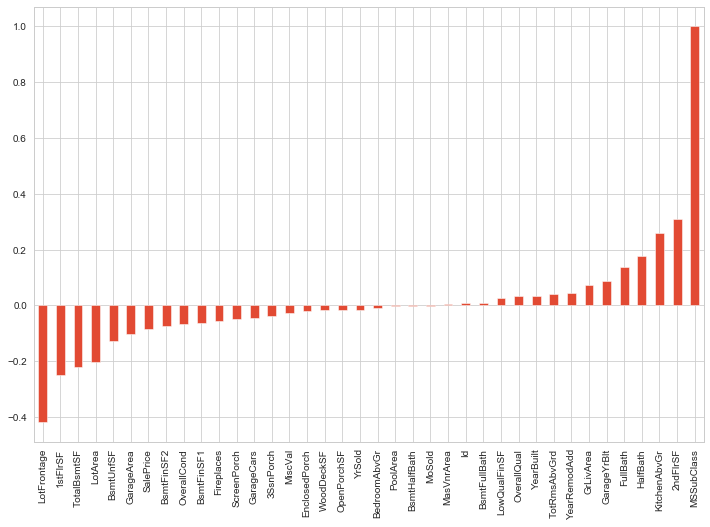

In [19]:
df_all.corr()['MSSubClass'].sort_values().plot(kind='bar')

In [20]:
df_all.groupby('MasVnrType').mean()['MasVnrArea']

MasVnrType
BrkCmn     195.480000
BrkFace    261.672355
None         0.707233
Stone      239.550201
Name: MasVnrArea, dtype: float64

In [56]:
df_all[df_all['MasVnrArea'] == 0.0]['MasVnrType'].value_counts()

None       1735
BrkFace       2
Stone         1
Name: MasVnrType, dtype: int64

In [50]:
df_all[(df_all['MasVnrType'] == 'None') & (df_all['MasVnrArea'] == 288)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin
624,625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,WD,Normal,165150.0,"(10320.0, 10400.0]"


In [58]:
df_all['MasVnrType'] = df_all[['MasVnrType','MasVnrArea']].apply(lambda x : 'None' if x[1] == 0.0 else x[0],axis=1)

In [59]:
df_all['MasVnrArea'] = df_all[['MasVnrType','MasVnrArea']].apply(lambda x : 0.0 if x[0] == 'None' else x[1],axis=1)

In [21]:
df_all[df_all['LotFrontage'] == 0 ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin


In [256]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2915 non-null   object  
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   object  
 6   Alley          198 non-null    object  
 7   LotShape       2919 non-null   object  
 8   LandContour    2919 non-null   object  
 9   Utilities      2917 non-null   object  
 10  LotConfig      2919 non-null   object  
 11  LandSlope      2919 non-null   object  
 12  Neighborhood   2919 non-null   object  
 13  Condition1     2919 non-null   object  
 14  Condition2     2919 non-null   object  
 15  BldgType       2919 non-null   object  
 16  HouseStyle     2919 non-null   object  
 17  OverallQual    2919 non-null   in

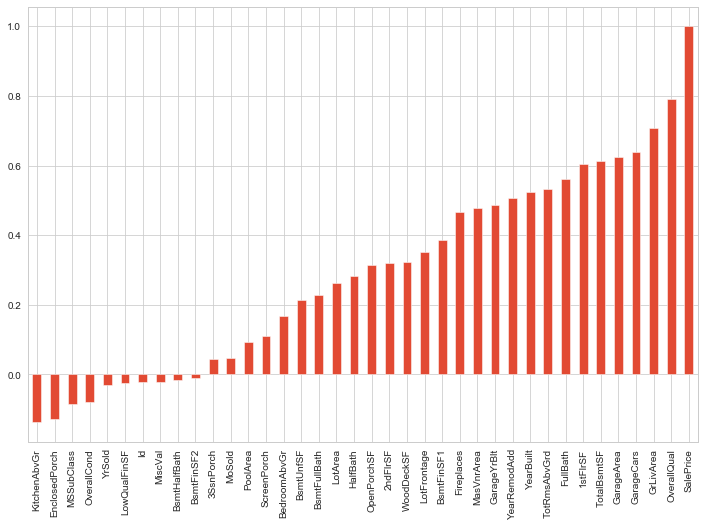

In [127]:
df_train.corr()['SalePrice'].sort_values().plot(kind='bar')

In [108]:
df_all.groupby(['OverallQual','MasVnrType']).mean()['MasVnrArea']

OverallQual  MasVnrType
1            None            0.000000
2            None            0.000000
3            BrkFace       340.000000
             None            0.000000
4            BrkCmn        202.200000
             BrkFace       162.214286
             None            0.000000
             Stone          94.666667
5            BrkCmn        150.222222
             BrkFace       185.887500
             None            0.000000
             Stone         207.550000
6            BrkCmn        242.181818
             BrkFace       241.833977
             None            0.000000
             Stone         209.444444
7            BrkCmn         58.000000
             BrkFace       214.834821
             None            0.000000
             Stone         151.157895
8            BrkFace       341.048276
             None            0.000000
             Stone         237.395062
9            BrkFace       456.233333
             None            0.000000
             Stone        

In [123]:
df_all[(df_all['MasVnrArea'].isna()) & (df_all['OverallQual'] == 11)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin


In [151]:
df_all[df_all['GarageArea'] == 0. ]['GarageYrBlt']

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
        ..
2893   NaN
2909   NaN
2913   NaN
2914   NaN
2917   NaN
Name: GarageYrBlt, Length: 157, dtype: float64

In [181]:
df_all[(df_all['GarageQual'].isna()) & (df_all['GarageType'] == 'Detchd')]['GarageArea']

2126    360.0
2576      NaN
Name: GarageArea, dtype: float64

In [165]:
df_all[df_all['GarageQual'].isna()]['GarageType'].unique()

array([nan, 'Detchd'], dtype=object)

In [188]:
df_all.groupby(['GarageCond','GarageType']).mean()['GarageArea']

GarageCond  GarageType
Ex          Detchd        600.000000
Fa          2Types        779.000000
            Attchd        399.400000
            CarPort       420.000000
            Detchd        320.477612
Gd          Attchd        595.666667
            Detchd        556.333333
Po          Attchd        376.000000
            Detchd        298.833333
TA          2Types        781.636364
            Attchd        525.964789
            Basment       431.027778
            BuiltIn       578.844086
            CarPort       411.785714
            Detchd        429.881503
Name: GarageArea, dtype: float64

In [190]:
df_all[df_all['TotalBsmtSF'] == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,500,10,2006,WD,Normal,90000.0,"(10759.18, 10800.0]"
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000.0,"(6000.0, 6120.0]"
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,109900.0,"(7133.56, 7200.0]"
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964.0,"(7007.6, 7133.56]"
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,109500.0,"(7133.56, 7200.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,2804,20,RL,100.0,21370,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,600,6,2006,WD,Normal,NaN,"(20158.76, 22857.12]"
2804,2805,30,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,"(8172.0, 8250.0]"
2824,2825,20,RL,80.0,12048,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN,"(11911.36, 12091.1]"
2891,2892,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Abnorml,NaN,"(12351.16, 12463.28]"


In [249]:
df_all.groupby(['BsmtCond','BsmtExposure','BsmtFinType1']).mean()['TotalBsmtSF']

BsmtCond  BsmtExposure  BsmtFinType1
Fa        Av            BLQ              858.000000
                        GLQ              870.000000
                        LwQ              992.000000
          Gd            LwQ              832.000000
          Mn            ALQ              895.000000
                        LwQ              616.000000
                        Rec             1214.000000
                        Unf              672.500000
          No            ALQ             1296.750000
                        BLQ              890.111111
                        LwQ             1014.736842
                        Rec              787.272727
                        Unf              763.808511
Gd        Av            ALQ              992.750000
                        GLQ             1232.500000
                        LwQ             1194.000000
                        Unf             1112.400000
          Gd            ALQ             1562.333333
                        BLQ

In [251]:
df_all[df_all['BsmtFinType2'].isna()]['TotalBsmtSF'].unique()

array([   0., 3206.,   nan])

In [255]:
df_all[(df_all['TotalBsmtSF'] == 3206) & (df_all['BsmtFinType2'].isna())]['BsmtFinType1']

332    GLQ
Name: BsmtFinType1, dtype: object

In [257]:
df_all['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [260]:
df_all[df_all['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotAreaBin
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,"(10320.0, 10400.0]"
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0,"(12898.24, 13072.0]"
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0,"(10899.42, 11001.2]"
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0,"(11201.92, 11316.14]"
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0,"(8172.0, 8250.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,20,RL,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,"(11075.0, 11201.92]"
2850,2851,60,RL,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN,"(20158.76, 22857.12]"
2900,2901,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN,"(33038.64, 215245.0]"
2901,2902,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,"(8049.58, 8124.52]"
